In [2]:
import matplotlib.pyplot as plt
import torch
from typing import Tuple
import sys
sys.path.insert(1, '../muograph')

%reload_ext autoreload
%autoreload 2

# **Generate voxel scattering density predictions**

Let's get the scattering **density predictions** of **cubes** made of various **materials** (lead, iron, glass, aluminum, uranium).

The detection system implemented in GEANT4 for the recording of the muon hits is presented below:

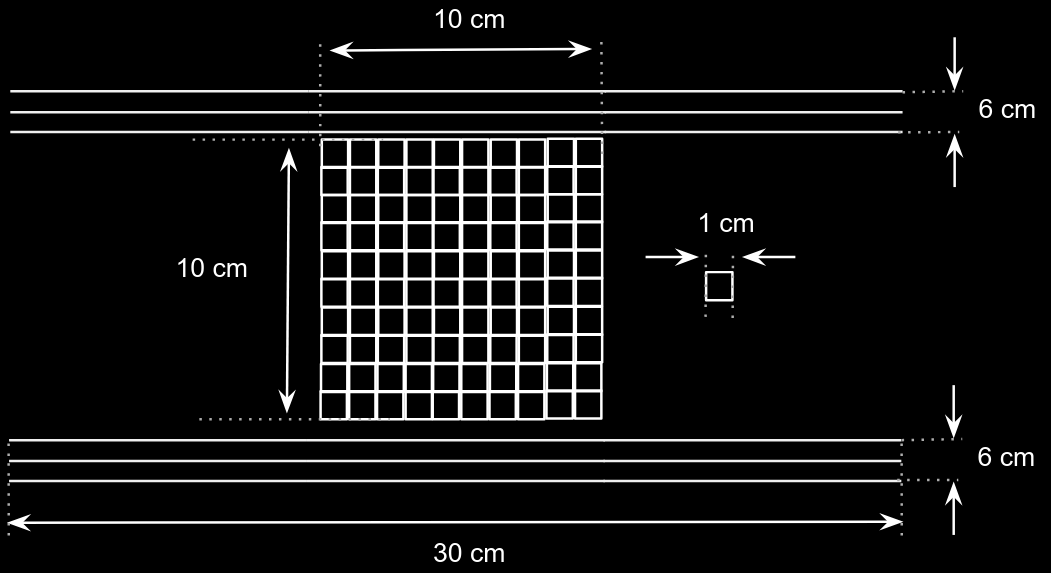

The blocks of material are $10\times10\times10 \:\:\mathrm{cm}^3$ cubes. The scattering density predictions are evaluated voxel-wise (1 $\mathrm{cm}^3$ voxels).

For each cube of material, scattering density predictions from various algorithms will be computed: (POCA, Binned Clustered Algorithm, Angle Statistic Reconstruction). 

Additionnally, the lumuosity granted by the detection set up will be evaluated.

In [2]:
# Define a volume of interest
from volume.volume import Volume

voi = Volume(
    position = [0, 0, -95], # in mm
    dimension = [100, 100, 100], # in mm
    voxel_width = 10, # in mm
    ) 

# **1 - Compute voxel-wise lumuosity**

Given a **voxelized volume**, the ***lumuosity*** can be defined as the **number of muons** passing through a given **voxel**.

 
![lumuosity](../images/lumuosity.png)

The voxels **lumuosity** map **depends only** on the **detection system used**; e.g the distanc between the upper and lower set of detector panles, their span, etc...

It can be evaluated by tracking muons through an empty volume between the detectors.


In [3]:
# Path to directoriy containing the data files
input_dir = "../data/cubes_material/"

# Muon hits file 
no_material_file = input_dir + "no_material_10cm3_1M_gen_new_source.csv"

import pandas as pd
df = pd.read_csv(no_material_file)

In [4]:
# Get incoming and outgoing muon hits
cols_in = [col for col in df.columns for label in [0, 1, 2] if str(label) in col] + ["E"]
cols_out = [col for col in df.columns for label in [3, 4, 5] if str(label) in col] + ["E"]

# Get hits
from hits.hits import Hits
hits_in, hits_out = Hits(df = df[cols_in][:]), Hits(df = df[cols_out][:])

# Compute tracks
from tracking.tracking import Tracking
tracks_in = Tracking(hits = hits_in, label = "above")
tracks_out = Tracking(hits = hits_out, label = "below")


/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists
Class attributes saved at /home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output/tracks_above.hdf5

/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists
Class attributes saved at /home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output/tracks_below.hdf5


In [5]:
output_dir = "../output/"

# Run MST tracking from tracking files
tracking_files = [
    output_dir + "tracks_above.hdf5",
    output_dir + "tracks_below.hdf5",

]
from tracking.tracking import TrackingMST
mst = TrackingMST(tracking_files = tracking_files)


/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists

Tracking attributes loaded from ../output/tracks_above.hdf5

Tracking attributes loaded from ../output/tracks_below.hdf5


In [6]:
# Run asr algorithm
from reconstruction.asr import ASR
asr = ASR(voi=voi, tracking=mst)


/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists



Sub-volumes



Voxel triggering


Saving trigerred voxels to /home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output/triggered_voxels.hdf5


In [27]:
from copy import deepcopy
# Compute voxel-wise lumuosity
lumuosity = deepcopy(asr.n_mu_per_vox)

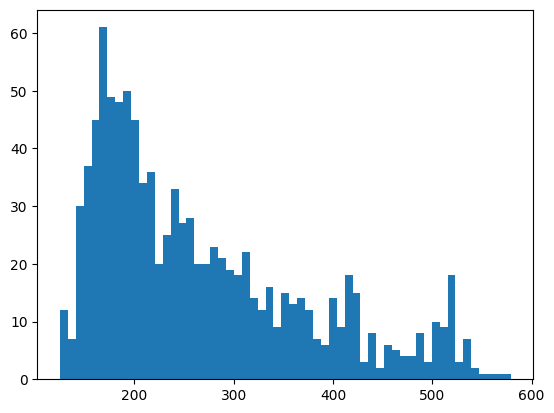

In [28]:
# Plot lumuosity
plt.hist(lumuosity.ravel(), bins = (torch.max(lumuosity)/10).int())
plt.show()

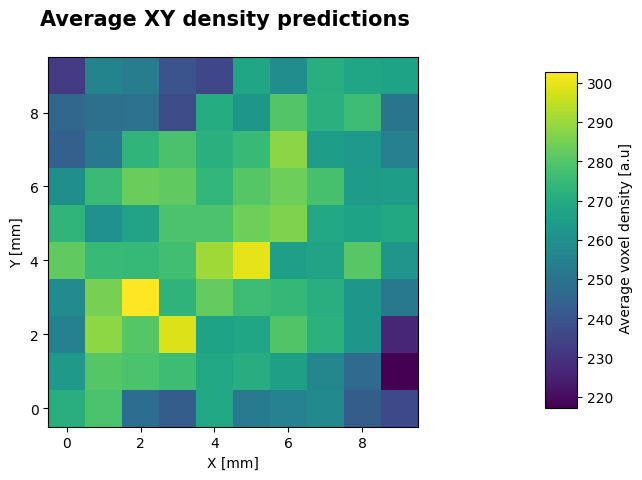

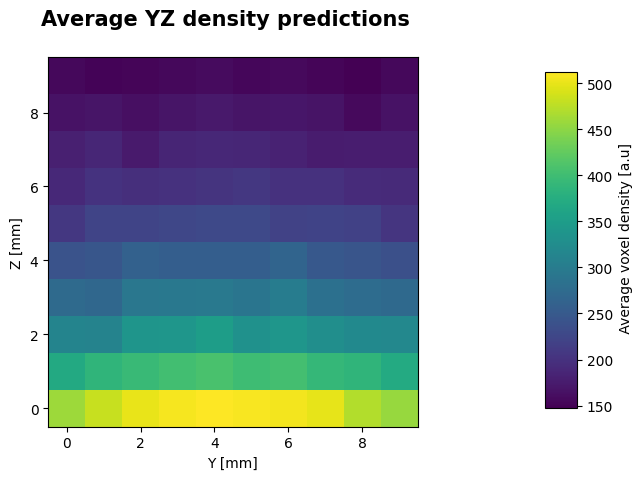

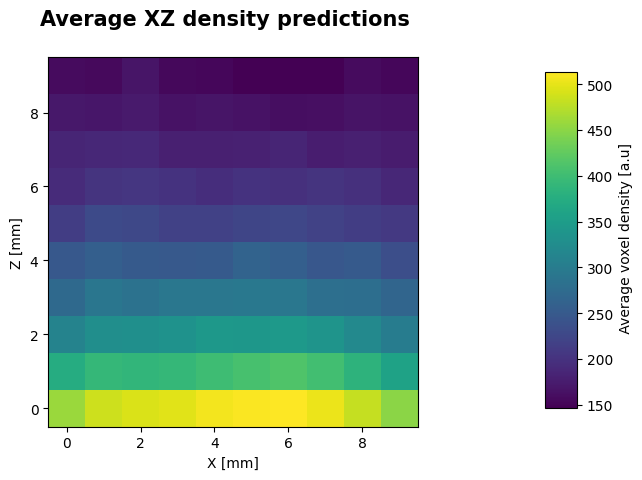

In [9]:
# Plot lumuosity

from plotting.plotting import plot_voxel_pred
plot_voxel_pred(lumuosity, dim = 2) # XY plane (horizontal)
plot_voxel_pred(lumuosity, dim = 0) # YZ plane (horizontal)
plot_voxel_pred(lumuosity, dim = 1) # XZ plane (horizontal)


# **2 - Compute scattering density predictions**

Now that the lumuosity of the device has been evaluated, one can compute the scattering density predictions of the various algorithms:

In [13]:
# Path to directoriy containing the data files
input_dir = "/home/geant/Desktop/TASKS/Muograph/MuographBeta/data/cubes_material/"

# Define a volume of interest
from volume.volume import Volume
voi = Volume(position = [0, 0, -95],
                     dimension = [100, 100, 100],
                     voxel_width = 10)

# The muons hits from MST detector
# for cubes of various materials (GEANT4)
files = (
    "aluminum_10cm3_1M_gen_new_source.csv", 
    "lead_10cm3_1M_gen_new_source.csv",
    "iron_10cm3_1M_gen_new_source.csv", 
    "uranium_10cm3_1M_gen_new_source.csv",
    "glass_10cm3_1M_gen_new_source.csv"
)

# Get the propreties of the associated element
from analysis.element import Al, Pb, Fe, U, glass
elements = (Al, Pb, Fe, U, glass)

In [14]:
def get_hits_in_out_from_csv_file(csv_file: str) -> Tuple[Hits, Hits]:

    import pandas as pd
    df = pd.read_csv(csv_file)

    # Get incoming and outgoing muon hits
    cols_in = [col for col in df.columns for label in [0, 1, 2] if str(label) in col] + ["E"]
    cols_out = [col for col in df.columns for label in [3, 4, 5] if str(label) in col] + ["E"]

    # Get hits
    from hits.hits import Hits
    hits_in, hits_out = Hits(df = df[cols_in][:]), Hits(df = df[cols_out][:])

    return hits_in, hits_out
    

We will start with the iron data set:

In [15]:
hits_in, hits_out = get_hits_in_out_from_csv_file(input_dir + files[2])

In [16]:
tracks_in = Tracking(hits = hits_in, label = "above")
tracks_out = Tracking(hits = hits_out, label = "below")


/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists
Class attributes saved at /home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output/tracks_above.hdf5

/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists
Class attributes saved at /home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output/tracks_below.hdf5


In [17]:
mst = TrackingMST(trackings=(tracks_in, tracks_out))


/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists


**POCA algorithm**

In [18]:
from reconstruction.poca import POCA
poca = POCA(tracking = mst, voi=voi)


/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists

Assigning voxel to each POCA point:


Class attributes saved at /home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output/poca.hdf5


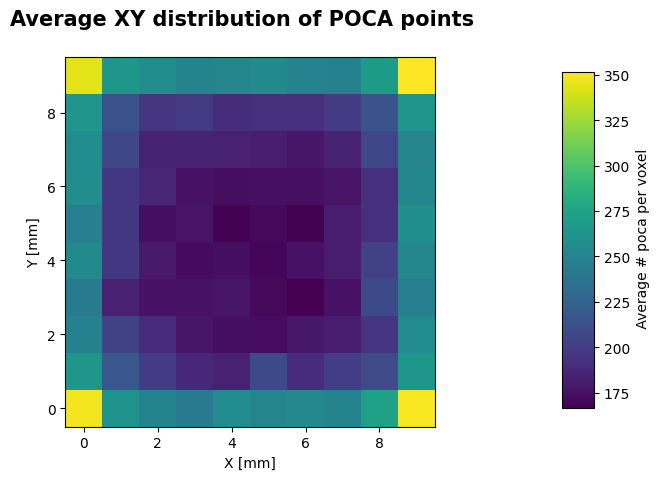

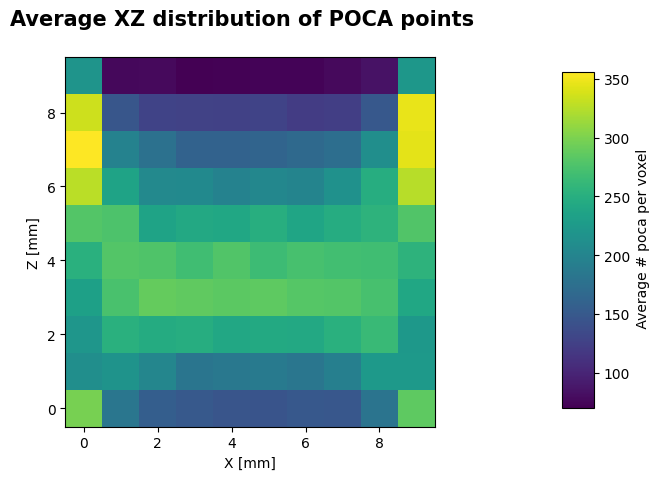

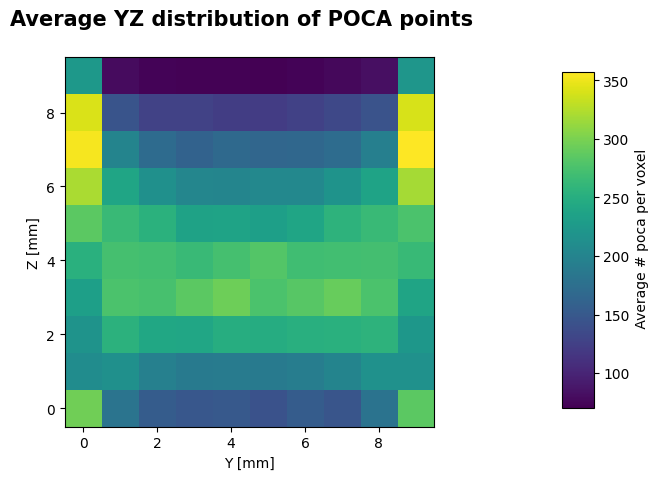

In [20]:
from plotting.plotting import plot_n_poca_per_voxel
plot_n_poca_per_voxel(poca.n_poca_per_vox, dim = 2)
plot_n_poca_per_voxel(poca.n_poca_per_vox, dim = 1)
plot_n_poca_per_voxel(poca.n_poca_per_vox, dim = 0)


**Binned Cluster Algorithm**

In [21]:
from reconstruction.binned_clustered import BCA
bca = BCA(voi = voi, tracking = mst)


/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output directory already exists
Class attributes saved at /home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output/poca.hdf5

Assigning voxel to each POCA point:



/home/geant/Desktop/TASKS/Muograph/MuographBeta/examples/../output/method_quantile_q=0.5_metric_log_0.02_0.17_rad_0_1000000_MeV_n_min_max_4_20_use_p_False directory already exists


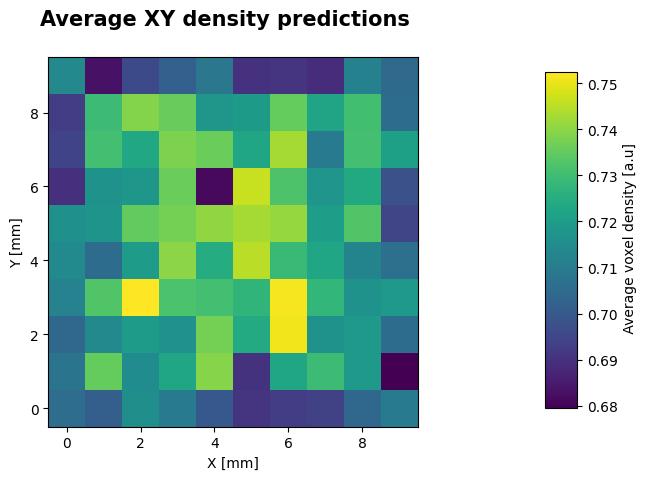

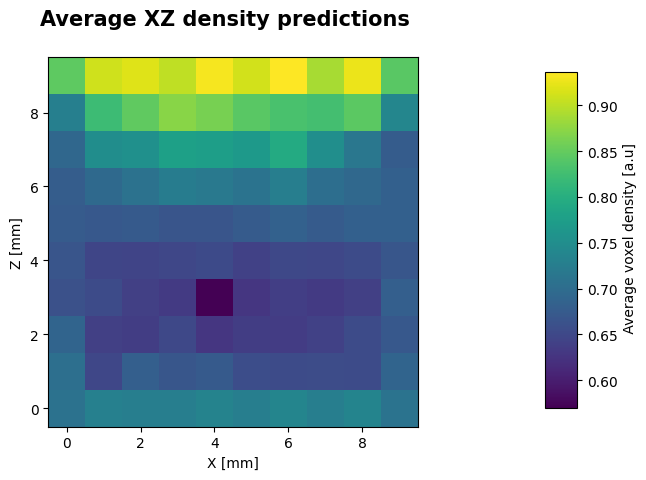

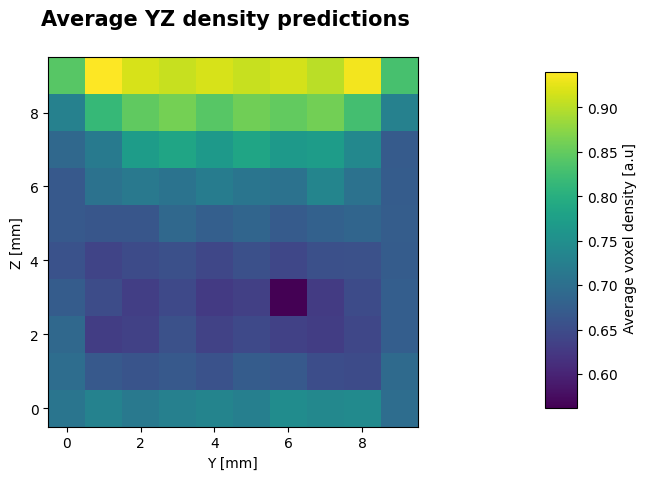

In [26]:
import numpy as np
from functools import partial
import math

bca.bca_reconstruction(
    n_max_per_vox=20, 
    n_min_per_vox=4, 
    score_method = partial(np.quantile, q=0.5),
    metric_method = partial(np.log),
    p_range = (0, 1000000),
    dtheta_range=(1 * math.pi / 180, 10 * math.pi / 180))

from plotting.plotting import plot_voxel_pred
plot_voxel_pred(bca.pred_norm, dim=2)
plot_voxel_pred(bca.pred_norm, dim=1)
plot_voxel_pred(bca.pred_norm, dim=0)


**Angle Statistic Reconstruction**

In [3]:
from reconstruction.asr import ASR
asr = ASR(voi=voi, tracking=mst)